# Model Comparison

In [89]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from ml import *

In [90]:
models = {
    'Logistic Regression': {'color': 'green', 'classifier': LogisticRegression},
    'Decision Tree': {'color': 'blue', 'classifier': DecisionTreeClassifier},
    'K-Nearest Neighbors': {'color': 'purple', 'classifier': KNeighborsClassifier},
    'Neural Network': {'color': 'orange', 'classifier': MLPClassifier}
}

In [91]:
X_train = None
X_test = None
y_train = None
y_test = None

In [92]:
def run_model(name, classifier, params, cmap):
    print(f"\n- {name}")
    
    model = classifier(**params)    
    y_pred, y_pred_proba = fit_and_predict(model, X_train, X_test, y_train, y_test)
    metrics, cm = get_metrics(y_test, y_pred, y_pred_proba)
    
    plot_confusion_matrix(cm, cmap)
    
    metrics_to_print = metrics.copy()
    metrics_to_print.pop('TPR')
    metrics_to_print.pop('FPR')
    
    for metric, value in metrics_to_print.items():
            print(f"    - {metric}: {value}")
        
    return metrics

## Wine Quality Dataset

In [93]:
# Preprocess dataset
wineDF = pd.read_csv("./data/winequality-red.csv")

wineDF['label'] = wineDF['quality'].apply(lambda x: 1 if x > 6 else 0)
wineDF.drop('quality', axis=1)

wine_y = wineDF['label'].values
wine_X = wineDF.drop('label', axis=1).values

In [94]:
# Standardize dataset
scaler = StandardScaler()
wine_X = scaler.fit_transform(wine_X)

In [95]:
# Obtained from grid search
models['Logistic Regression']['params'] = {'C': 0.046415888336127774, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
models['Decision Tree']['params'] = {'max_depth': None, 'criterion': 'entropy'}
models['K-Nearest Neighbors']['params'] = {'n_neighbors': 3}
models['Neural Network']['params'] = {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'max_iter': 200, 'solver': 'adam'}


Split 1:

- Logistic Regression


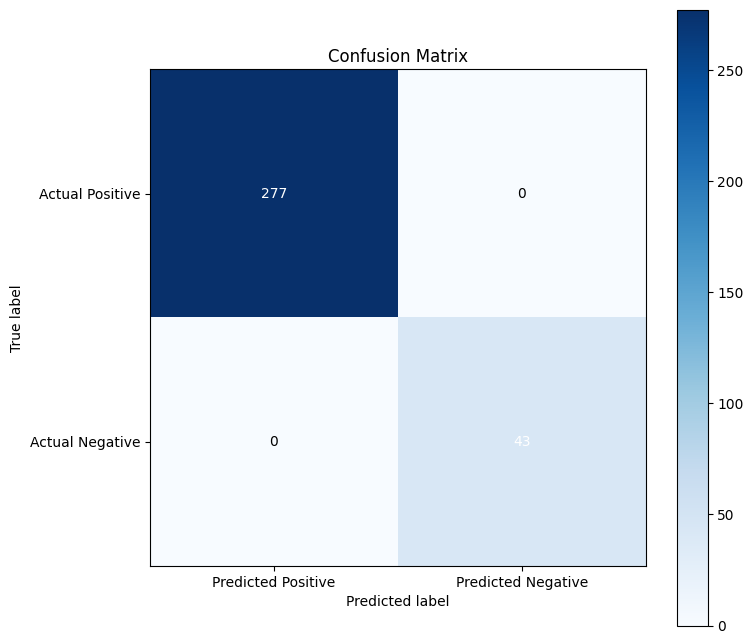

    - Accuracy: 1.0
    - Precision: 1.0
    - Recall: 1.0
    - F1: 1.0
    - AUC: 1.0

- Decision Tree


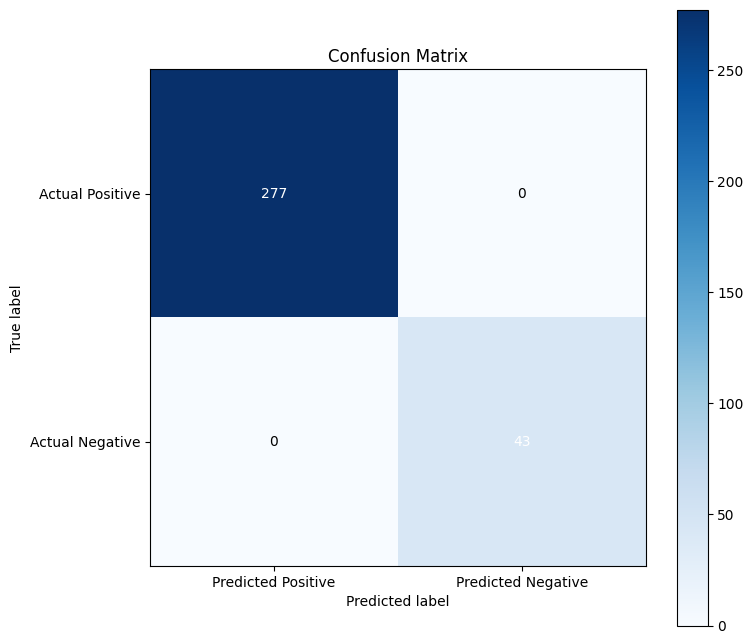

    - Accuracy: 1.0
    - Precision: 1.0
    - Recall: 1.0
    - F1: 1.0
    - AUC: 1.0

- K-Nearest Neighbors


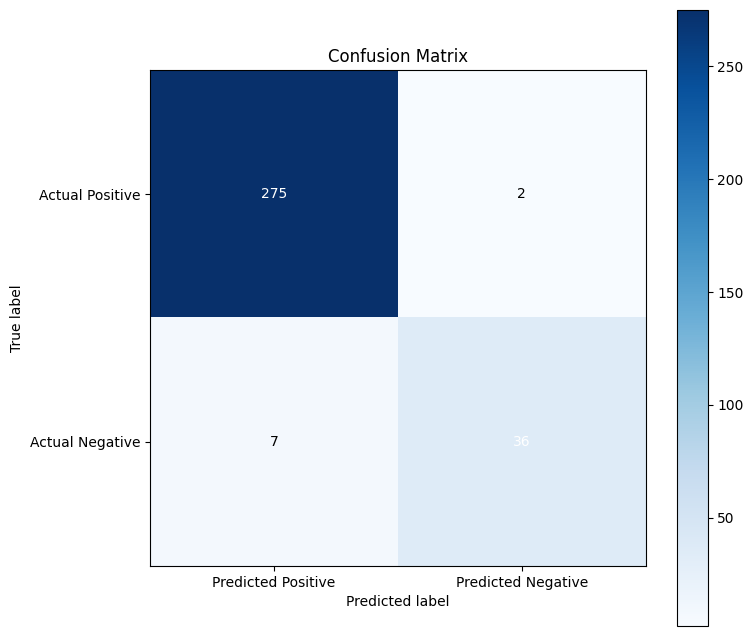

    - Accuracy: 0.971875
    - Precision: 0.9473684210526315
    - Recall: 0.8372093023255814
    - F1: 0.8888888888888888
    - AUC: 0.9733019897573671

- Neural Network


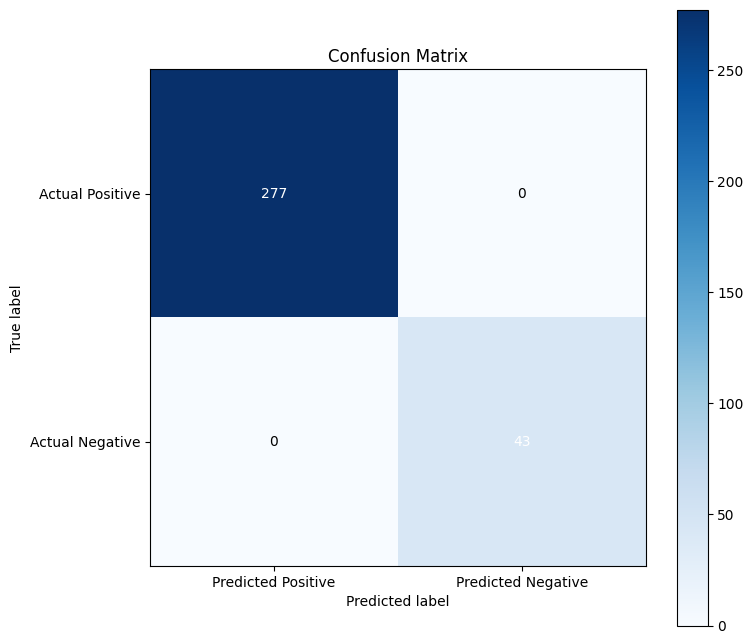

    - Accuracy: 1.0
    - Precision: 1.0
    - Recall: 1.0
    - F1: 1.0
    - AUC: 1.0

Split 2:

- Logistic Regression


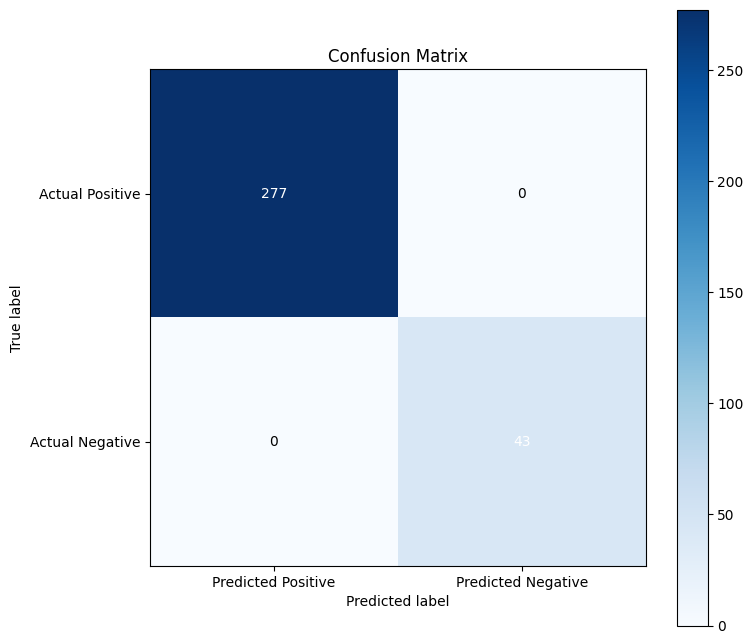

    - Accuracy: 1.0
    - Precision: 1.0
    - Recall: 1.0
    - F1: 1.0
    - AUC: 1.0

- Decision Tree


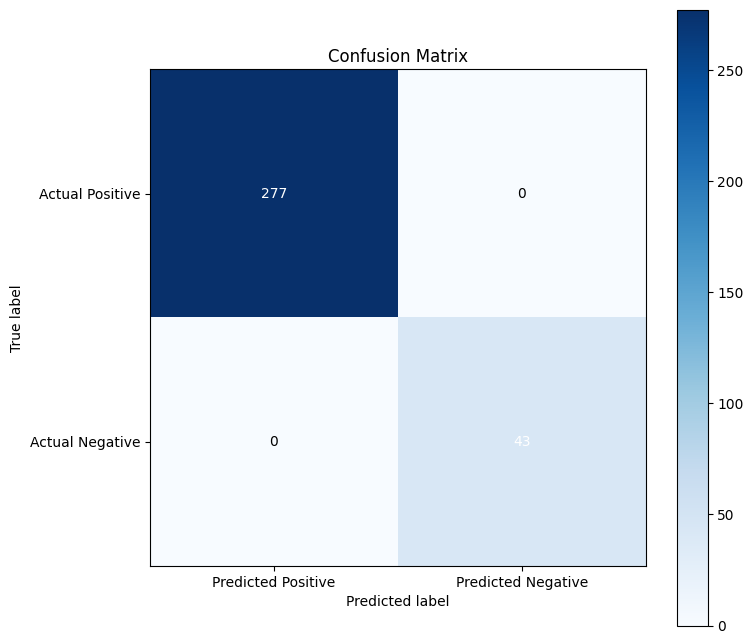

    - Accuracy: 1.0
    - Precision: 1.0
    - Recall: 1.0
    - F1: 1.0
    - AUC: 1.0

- K-Nearest Neighbors


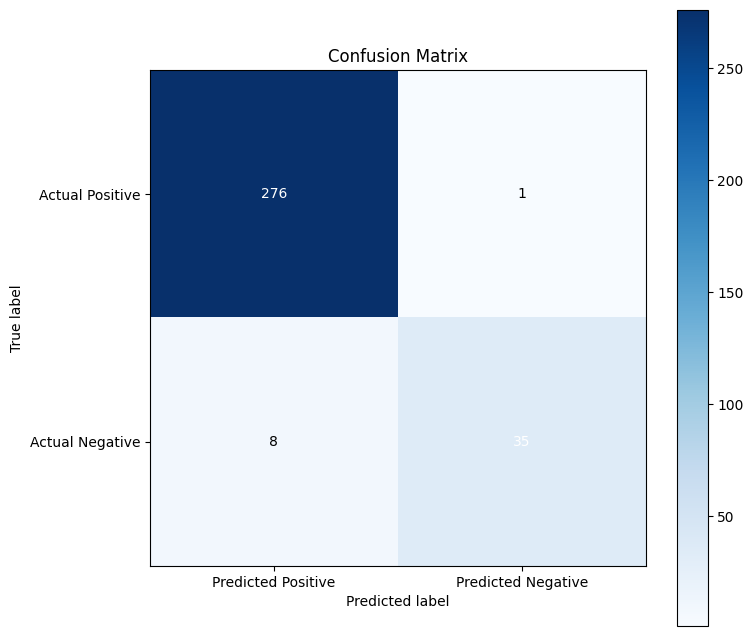

    - Accuracy: 0.971875
    - Precision: 0.9722222222222222
    - Recall: 0.813953488372093
    - F1: 0.8860759493670886
    - AUC: 0.9858953908152128

- Neural Network


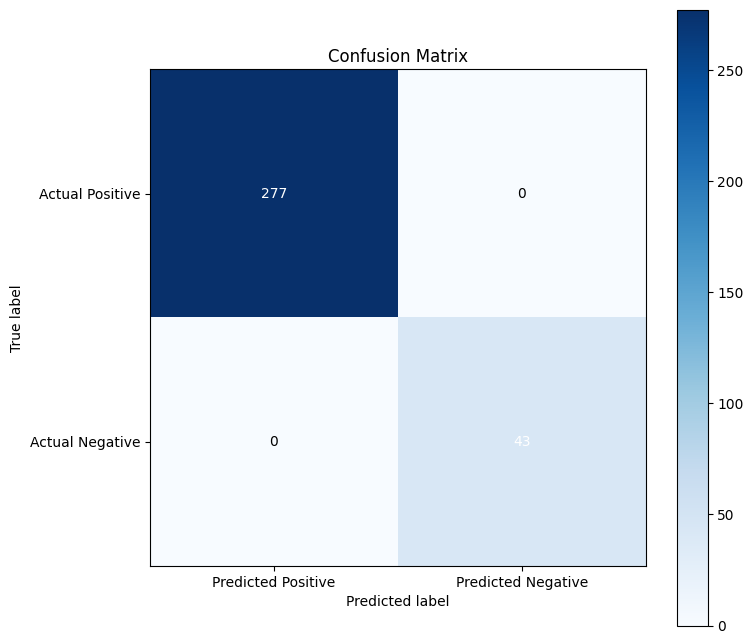

    - Accuracy: 1.0
    - Precision: 1.0
    - Recall: 1.0
    - F1: 1.0
    - AUC: 1.0

Split 3:

- Logistic Regression


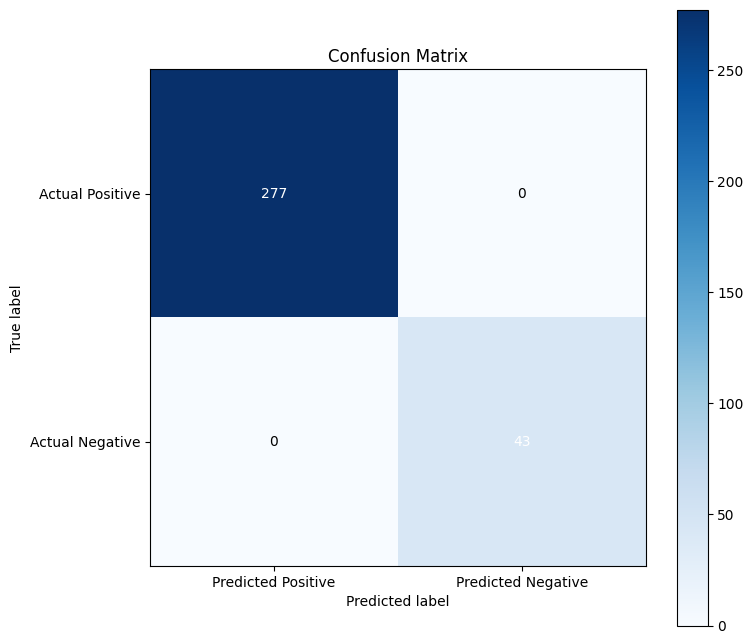

    - Accuracy: 1.0
    - Precision: 1.0
    - Recall: 1.0
    - F1: 1.0
    - AUC: 1.0

- Decision Tree


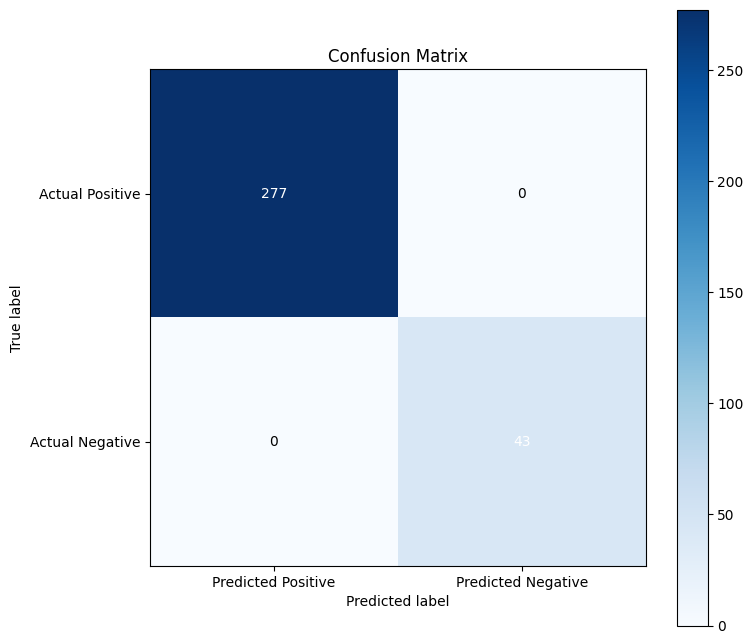

    - Accuracy: 1.0
    - Precision: 1.0
    - Recall: 1.0
    - F1: 1.0
    - AUC: 1.0

- K-Nearest Neighbors


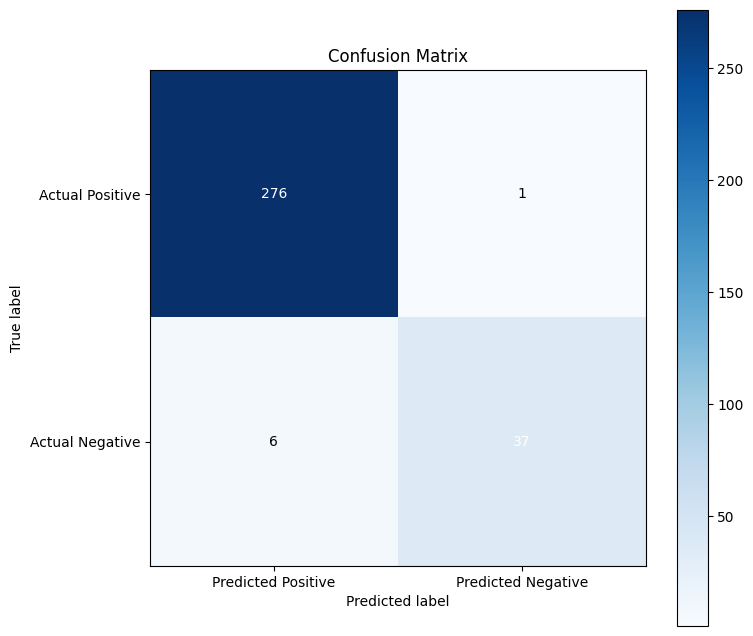

    - Accuracy: 0.978125
    - Precision: 0.9736842105263158
    - Recall: 0.8604651162790697
    - F1: 0.9135802469135802
    - AUC: 0.9750650659054655

- Neural Network


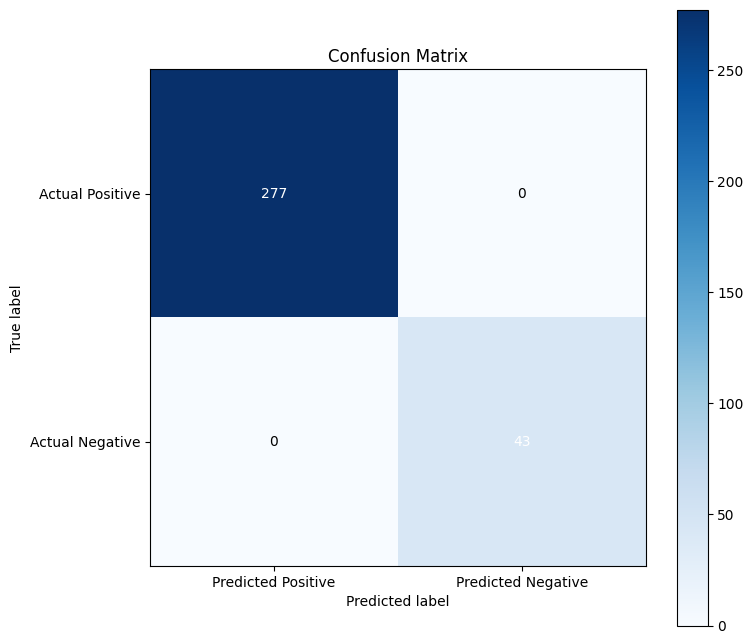

    - Accuracy: 1.0
    - Precision: 1.0
    - Recall: 1.0
    - F1: 1.0
    - AUC: 1.0

Split 4:

- Logistic Regression


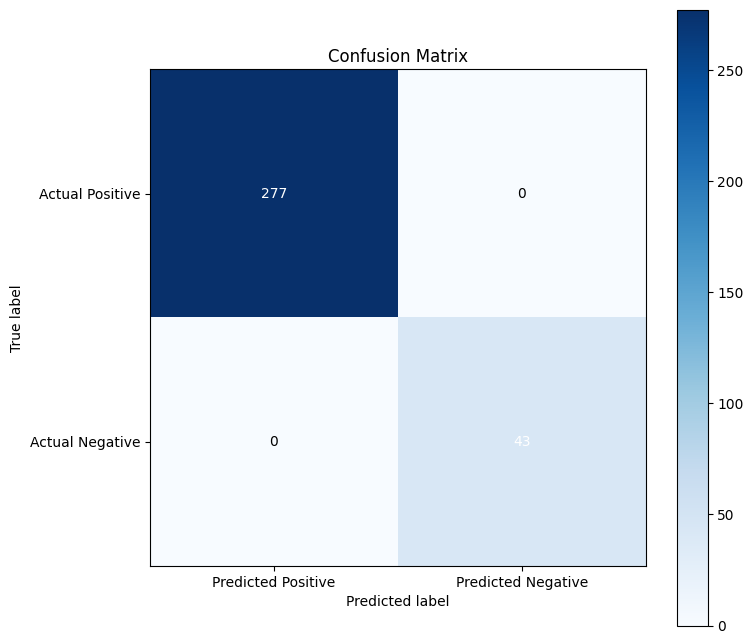

    - Accuracy: 1.0
    - Precision: 1.0
    - Recall: 1.0
    - F1: 1.0
    - AUC: 1.0

- Decision Tree


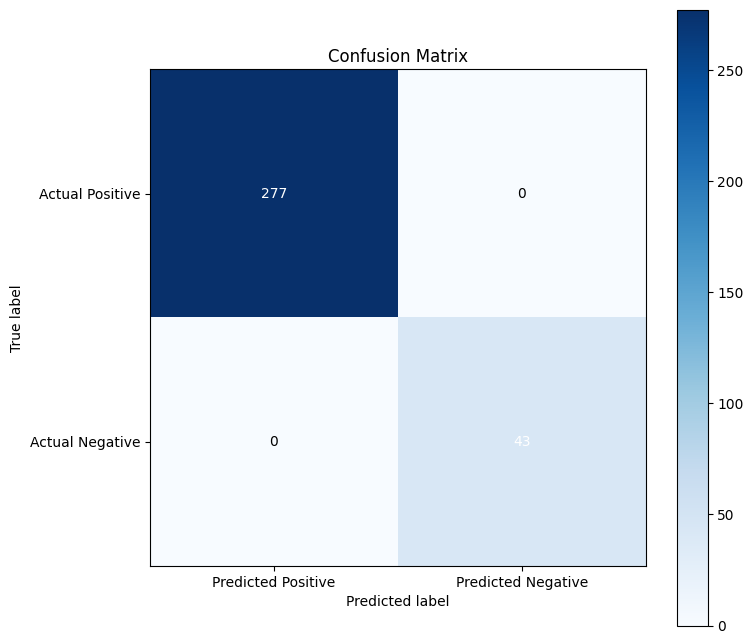

    - Accuracy: 1.0
    - Precision: 1.0
    - Recall: 1.0
    - F1: 1.0
    - AUC: 1.0

- K-Nearest Neighbors


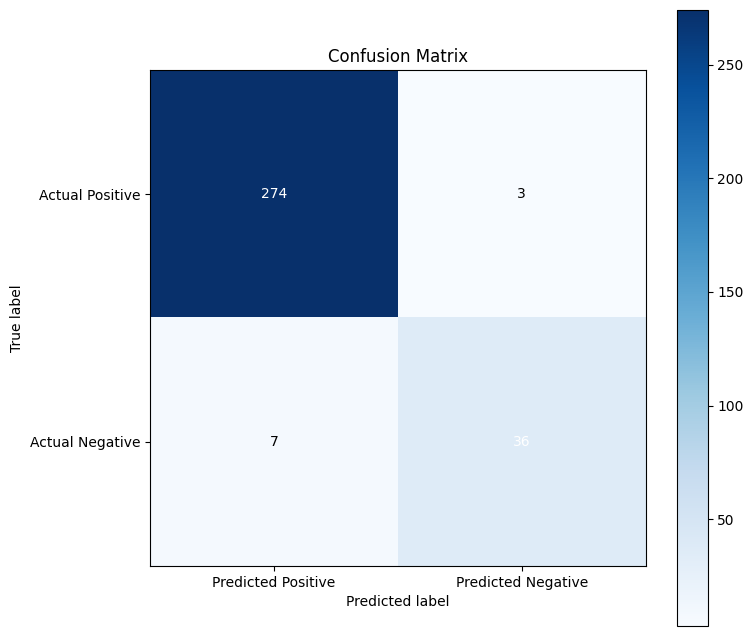

    - Accuracy: 0.96875
    - Precision: 0.9230769230769231
    - Recall: 0.8372093023255814
    - F1: 0.8780487804878049
    - AUC: 0.9954663756191755

- Neural Network


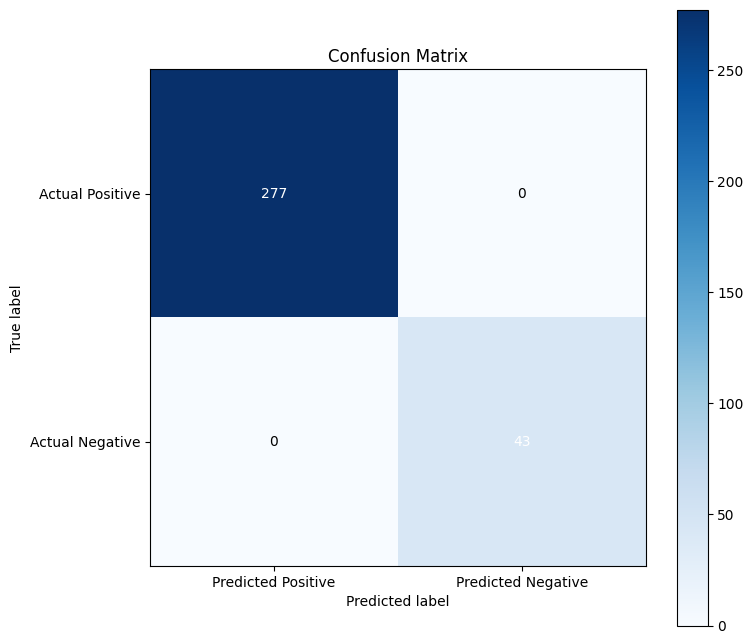

    - Accuracy: 1.0
    - Precision: 1.0
    - Recall: 1.0
    - F1: 1.0
    - AUC: 0.9999999999999999

Split 5:

- Logistic Regression


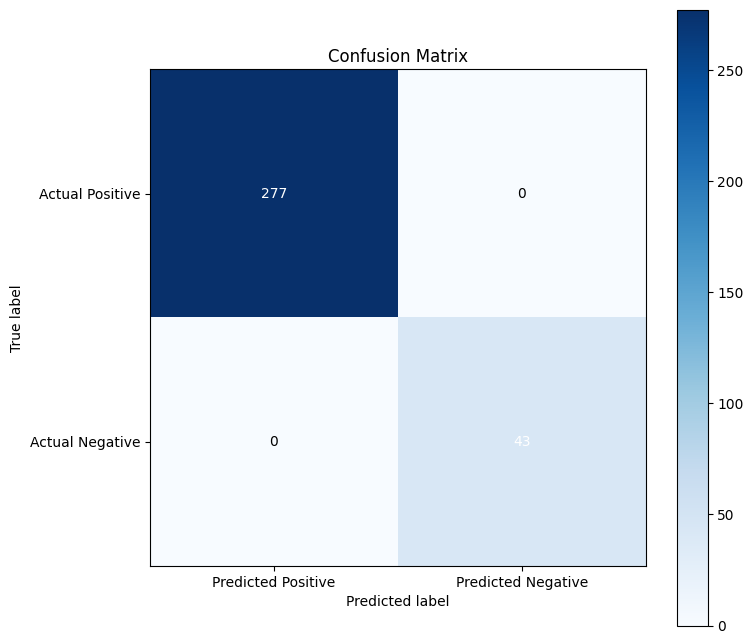

    - Accuracy: 1.0
    - Precision: 1.0
    - Recall: 1.0
    - F1: 1.0
    - AUC: 1.0

- Decision Tree


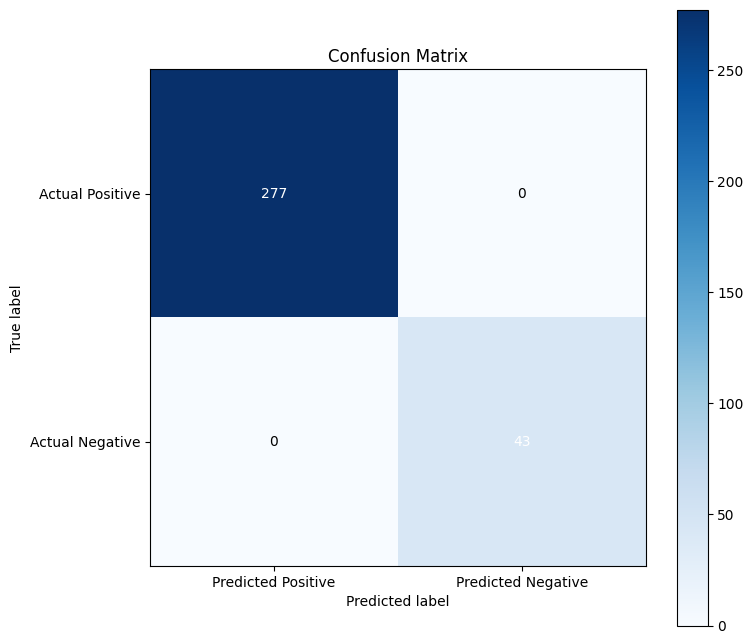

    - Accuracy: 1.0
    - Precision: 1.0
    - Recall: 1.0
    - F1: 1.0
    - AUC: 1.0

- K-Nearest Neighbors


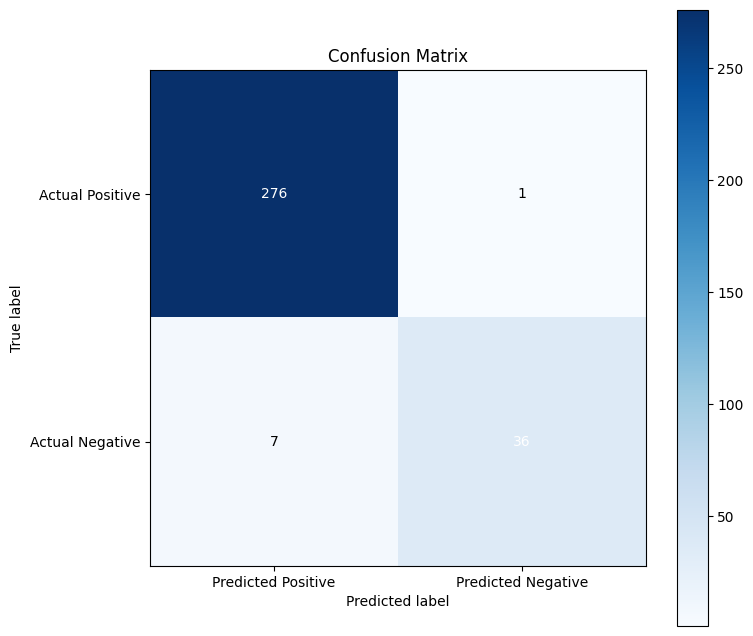

    - Accuracy: 0.975
    - Precision: 0.972972972972973
    - Recall: 0.8372093023255814
    - F1: 0.9
    - AUC: 0.9968936277390648

- Neural Network


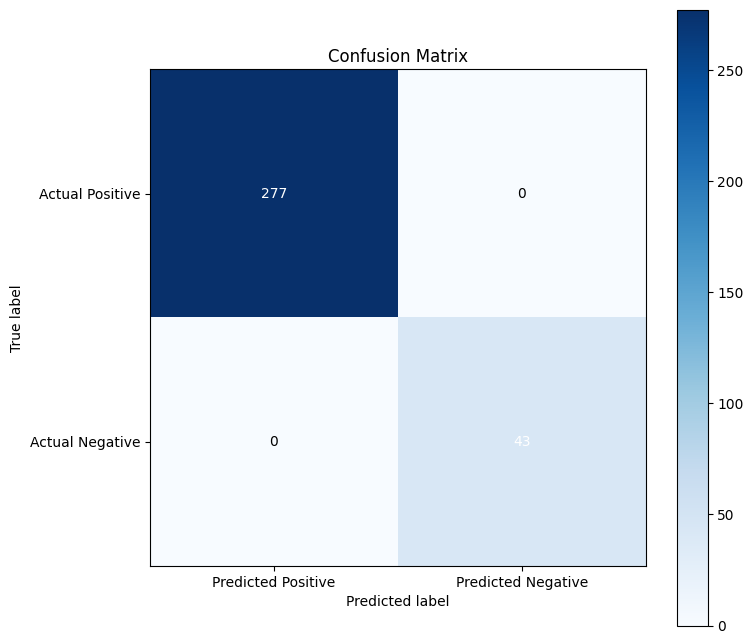

    - Accuracy: 1.0
    - Precision: 1.0
    - Recall: 1.0
    - F1: 1.0
    - AUC: 1.0


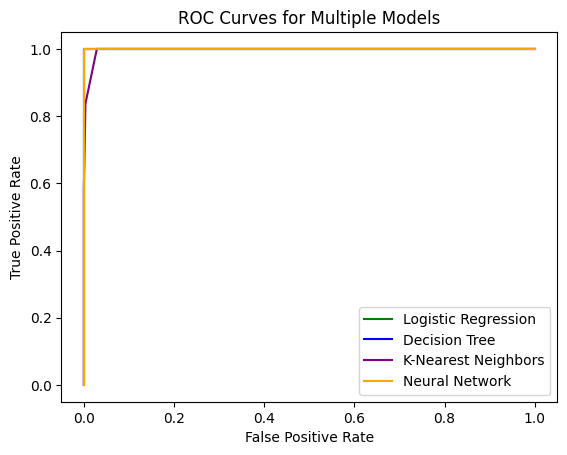

In [96]:
# Cross validate
all_metrics = {}

for i in range(5):
    print(f"\nSplit {i+1}:")
    
    (X_train, X_test, y_train, y_test) = train_test_split(wine_X, wine_y, test_size=0.2, stratify=wine_y)
    
    for key, model in models.items():
        metrics = run_model(key, model['classifier'], model['params'], plt.cm.Blues)
        all_metrics[key] = metrics
        
plt.figure()

for name, metrics in all_metrics.items():
        plt.plot(metrics['FPR'],metrics['TPR'], linestyle='-', color=models[name]['color'], label=name)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Models')
plt.legend()
plt.show()

## Heart Disease Dataset

In [97]:
# Preprocess dataset
heartDF = pd.read_csv("./data/heart_statlog_cleveland_hungary_final.csv")

heart_y = heartDF['target'].values
heart_X = heartDF.drop('target', axis=1).values

In [98]:
# Standardize dataset
scaler = StandardScaler()
heart_X = scaler.fit_transform(heart_X)

In [99]:
# Obtained from grid search
models['Logistic Regression']['params'] = {'C': 0.046415888336127774, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
models['Decision Tree']['params'] = {'max_depth': 20, 'criterion': 'entropy'}
models['K-Nearest Neighbors']['params'] = {'n_neighbors': 10}
models['Neural Network']['params'] = {'activation': 'relu', 'hidden_layer_sizes': (100,), 'max_iter': 300, 'solver': 'lbfgs'}


Split 1:

- Logistic Regression


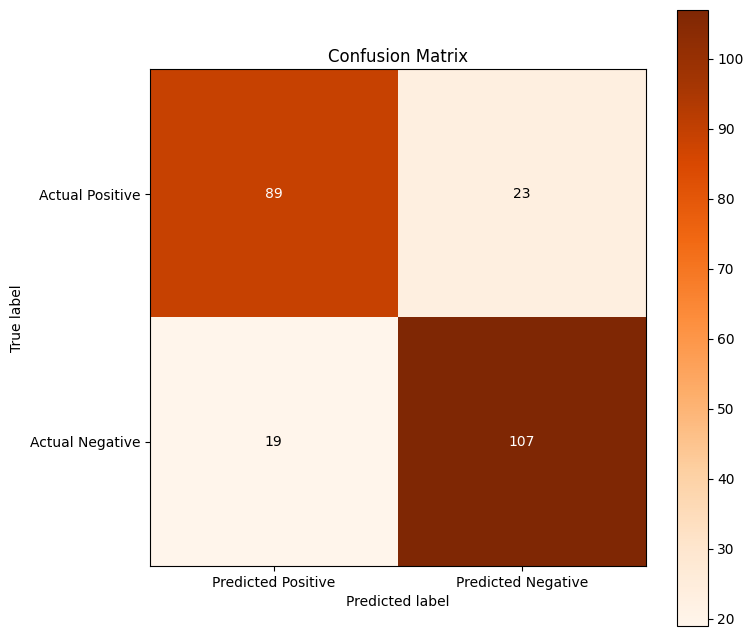

    - Accuracy: 0.8235294117647058
    - Precision: 0.823076923076923
    - Recall: 0.8492063492063492
    - F1: 0.8359375
    - AUC: 0.8802437641723356

- Decision Tree


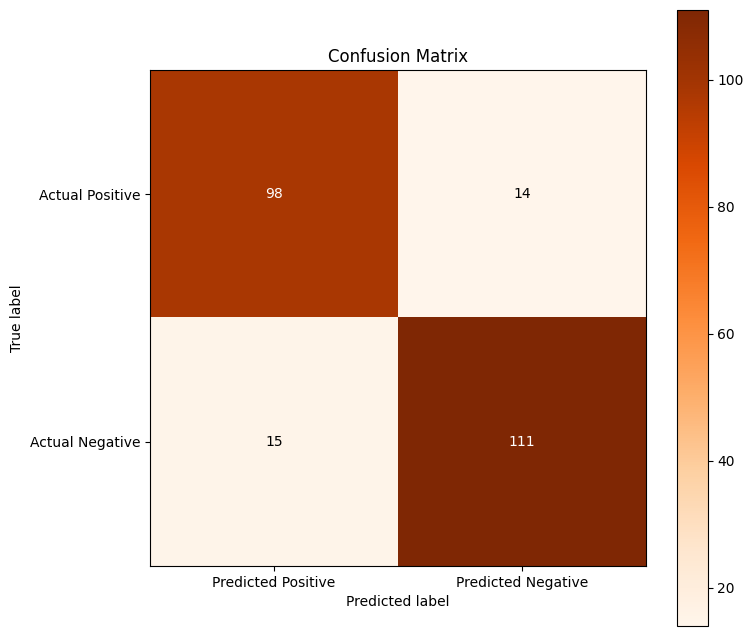

    - Accuracy: 0.8781512605042017
    - Precision: 0.888
    - Recall: 0.8809523809523809
    - F1: 0.8844621513944223
    - AUC: 0.8779761904761905

- K-Nearest Neighbors


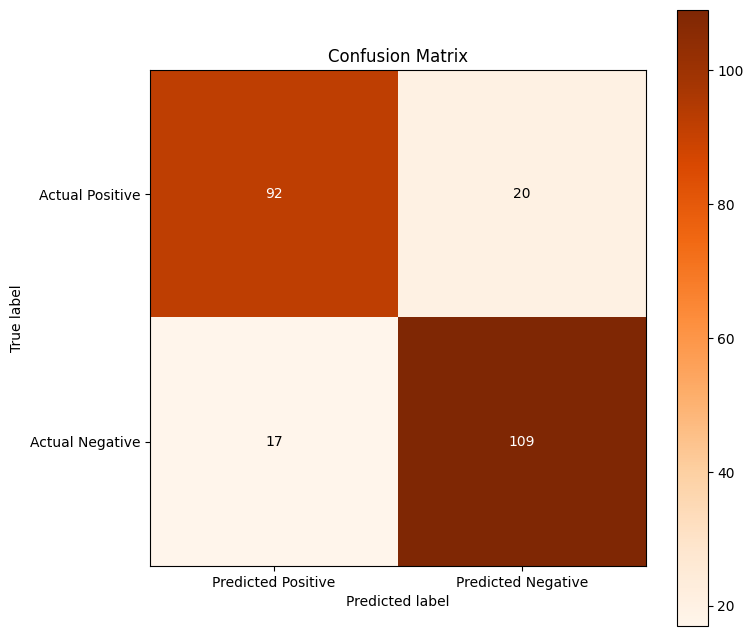

    - Accuracy: 0.8445378151260504
    - Precision: 0.8449612403100775
    - Recall: 0.8650793650793651
    - F1: 0.8549019607843137
    - AUC: 0.9240008503401361

- Neural Network


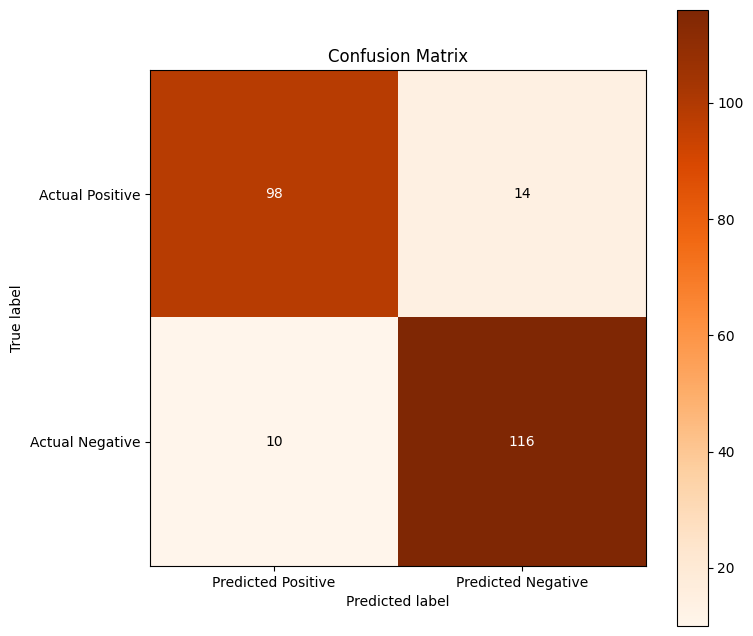

    - Accuracy: 0.8991596638655462
    - Precision: 0.8923076923076924
    - Recall: 0.9206349206349206
    - F1: 0.90625
    - AUC: 0.91578089569161

Split 2:

- Logistic Regression


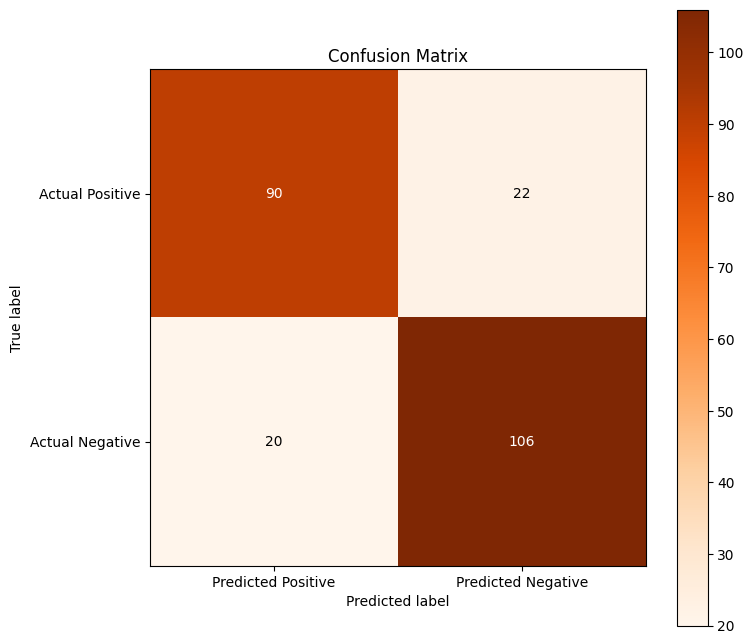

    - Accuracy: 0.8235294117647058
    - Precision: 0.828125
    - Recall: 0.8412698412698413
    - F1: 0.8346456692913385
    - AUC: 0.8765589569160998

- Decision Tree


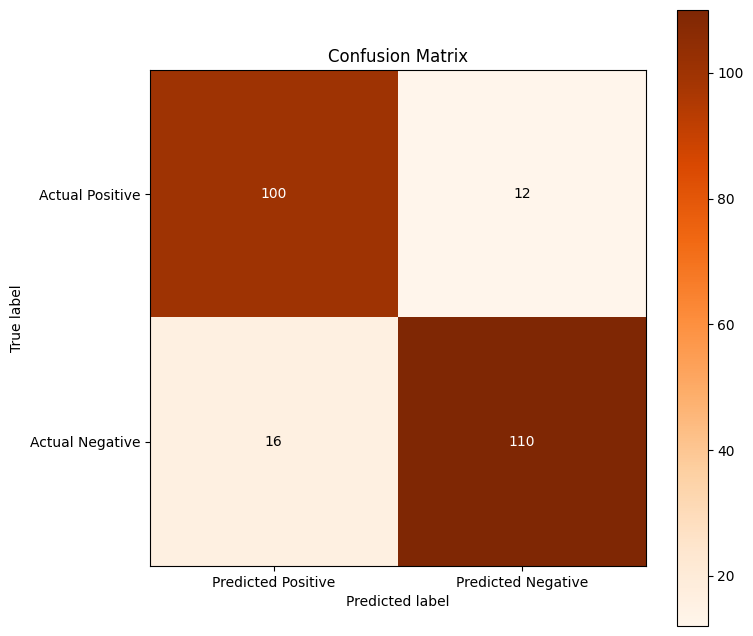

    - Accuracy: 0.8823529411764706
    - Precision: 0.9016393442622951
    - Recall: 0.873015873015873
    - F1: 0.8870967741935484
    - AUC: 0.882936507936508

- K-Nearest Neighbors


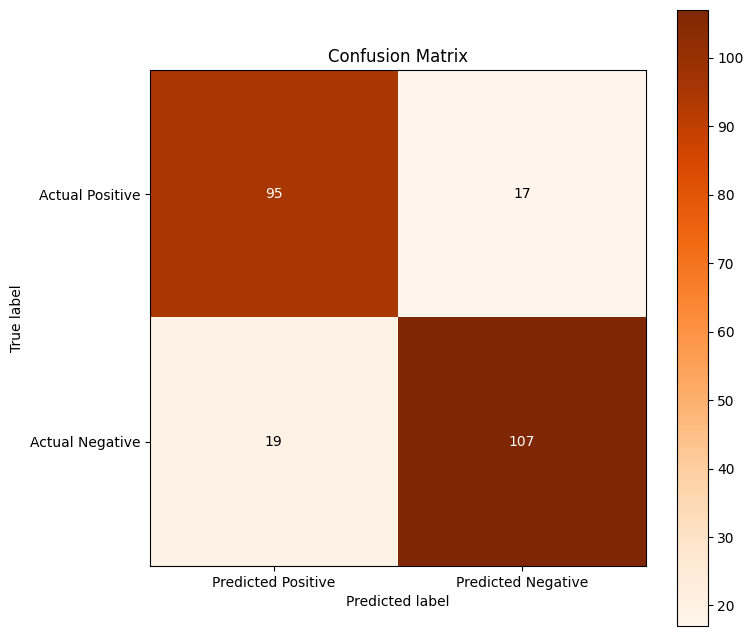

    - Accuracy: 0.8487394957983193
    - Precision: 0.8629032258064516
    - Recall: 0.8492063492063492
    - F1: 0.856
    - AUC: 0.9141865079365079

- Neural Network


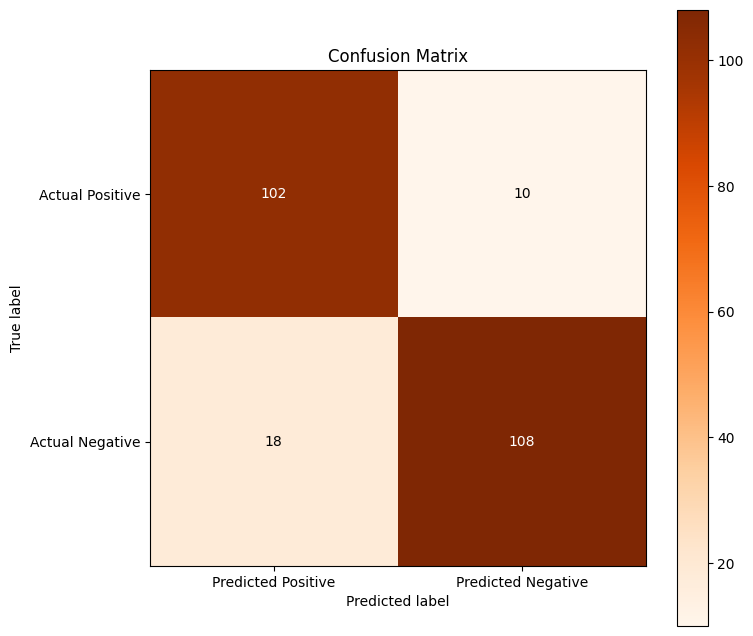

    - Accuracy: 0.8823529411764706
    - Precision: 0.9152542372881356
    - Recall: 0.8571428571428571
    - F1: 0.8852459016393442
    - AUC: 0.9183673469387755

Split 3:

- Logistic Regression


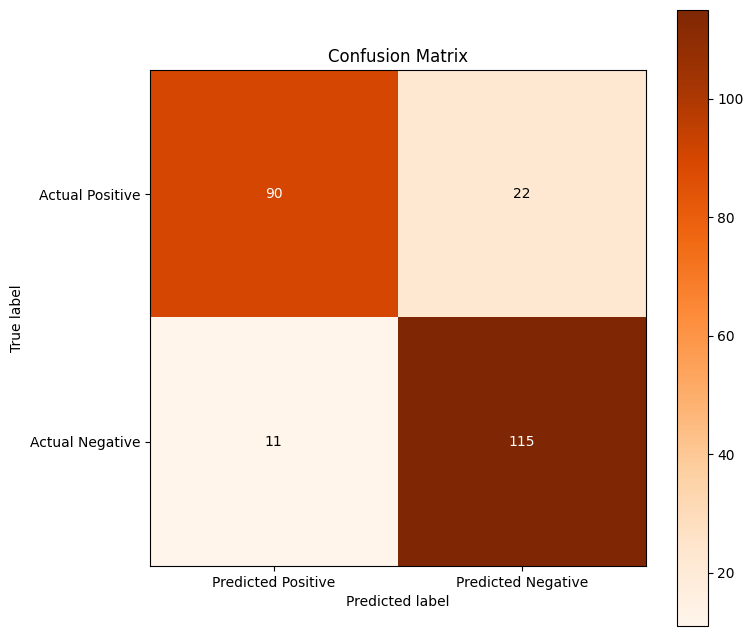

    - Accuracy: 0.8613445378151261
    - Precision: 0.8394160583941606
    - Recall: 0.9126984126984127
    - F1: 0.8745247148288974
    - AUC: 0.918154761904762

- Decision Tree


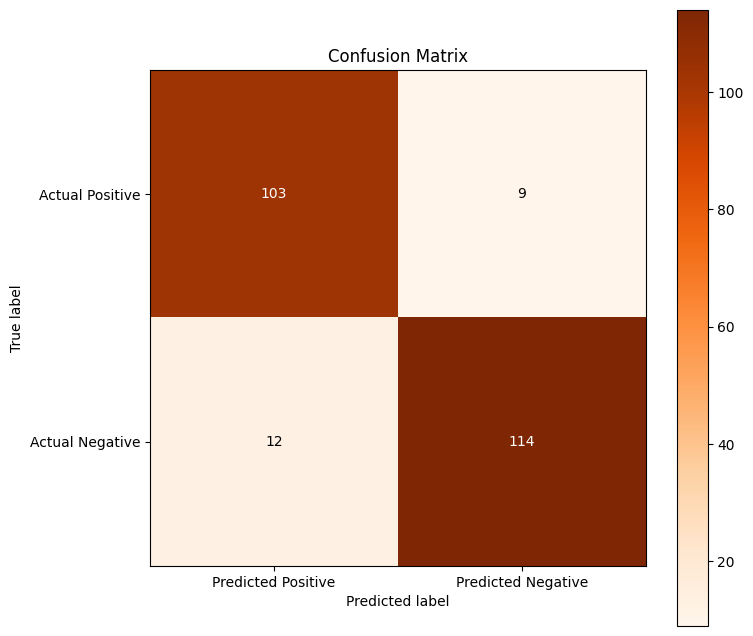

    - Accuracy: 0.9117647058823529
    - Precision: 0.926829268292683
    - Recall: 0.9047619047619048
    - F1: 0.9156626506024096
    - AUC: 0.9122023809523809

- K-Nearest Neighbors


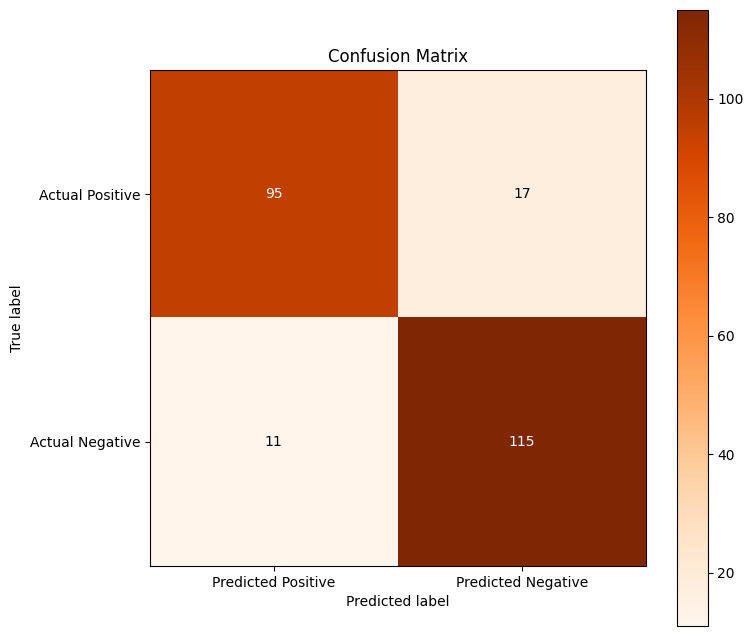

    - Accuracy: 0.8823529411764706
    - Precision: 0.8712121212121212
    - Recall: 0.9126984126984127
    - F1: 0.8914728682170543
    - AUC: 0.9472434807256236

- Neural Network


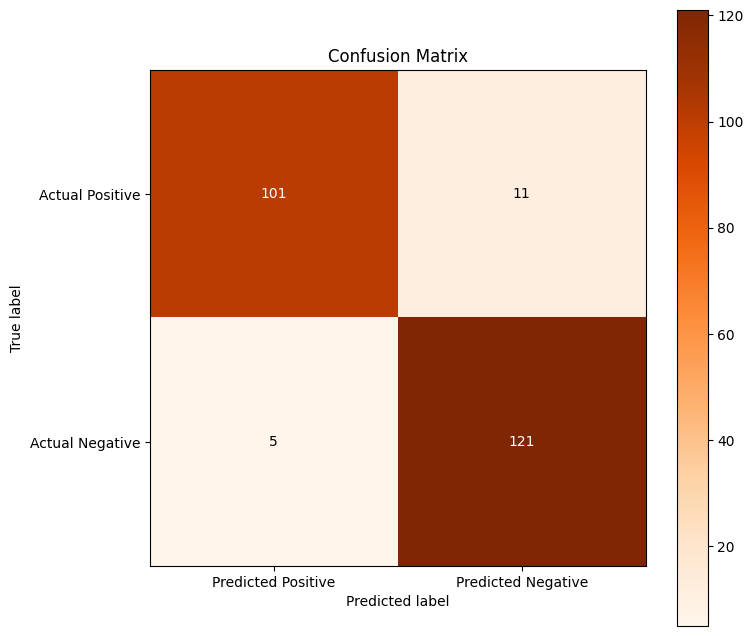

    - Accuracy: 0.9327731092436975
    - Precision: 0.9166666666666666
    - Recall: 0.9603174603174603
    - F1: 0.937984496124031
    - AUC: 0.9558531746031746

Split 4:

- Logistic Regression


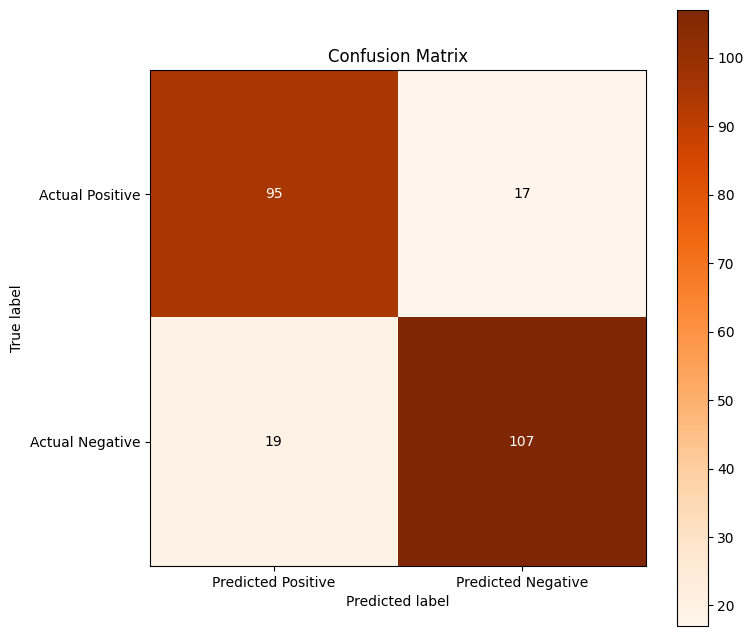

    - Accuracy: 0.8487394957983193
    - Precision: 0.8629032258064516
    - Recall: 0.8492063492063492
    - F1: 0.856
    - AUC: 0.9157454648526077

- Decision Tree


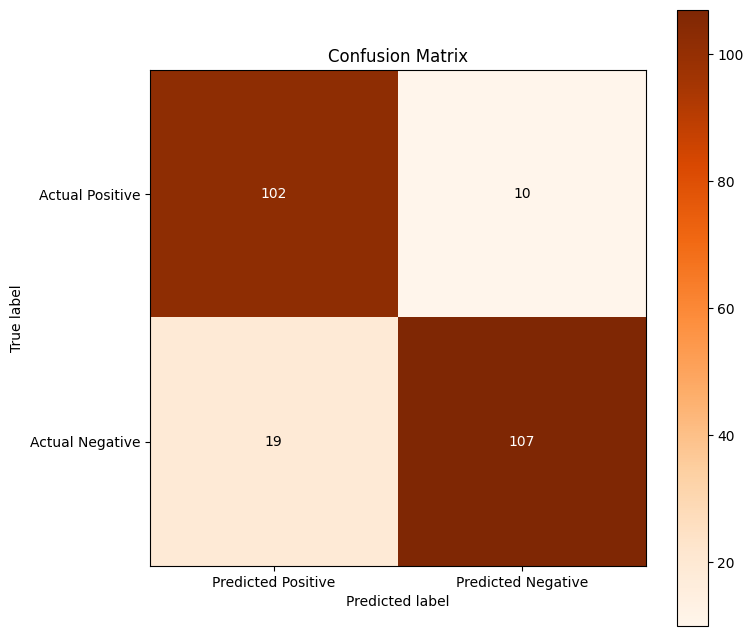

    - Accuracy: 0.8781512605042017
    - Precision: 0.9145299145299145
    - Recall: 0.8492063492063492
    - F1: 0.8806584362139918
    - AUC: 0.8799603174603176

- K-Nearest Neighbors


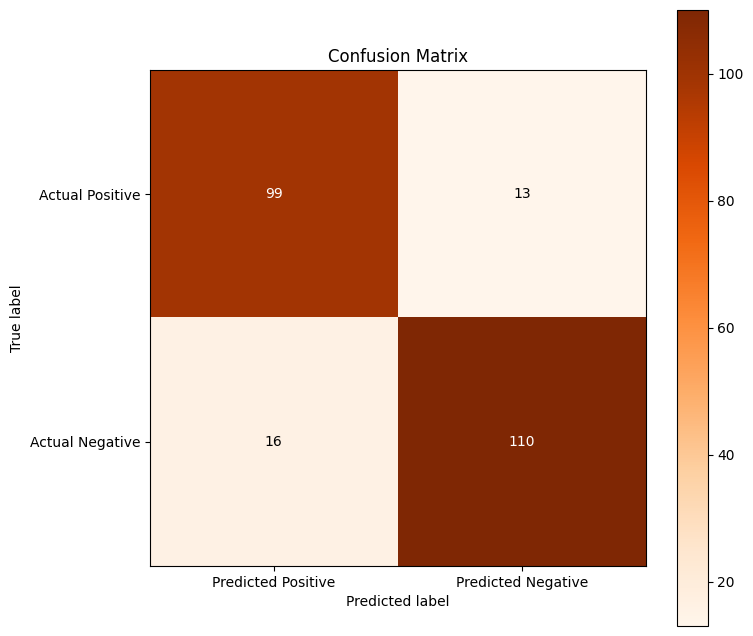

    - Accuracy: 0.8781512605042017
    - Precision: 0.8943089430894309
    - Recall: 0.873015873015873
    - F1: 0.8835341365461847
    - AUC: 0.9263392857142858

- Neural Network


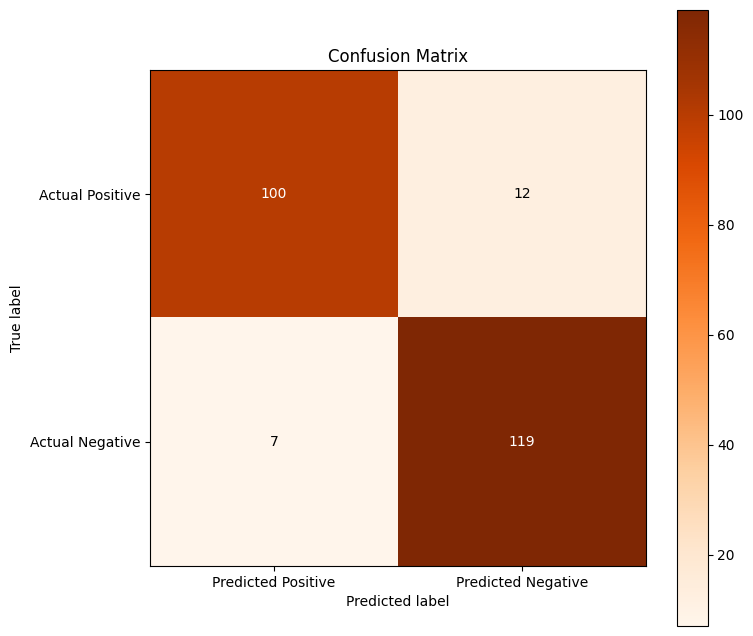

    - Accuracy: 0.9201680672268907
    - Precision: 0.9083969465648855
    - Recall: 0.9444444444444444
    - F1: 0.9260700389105059
    - AUC: 0.9451884920634921

Split 5:

- Logistic Regression


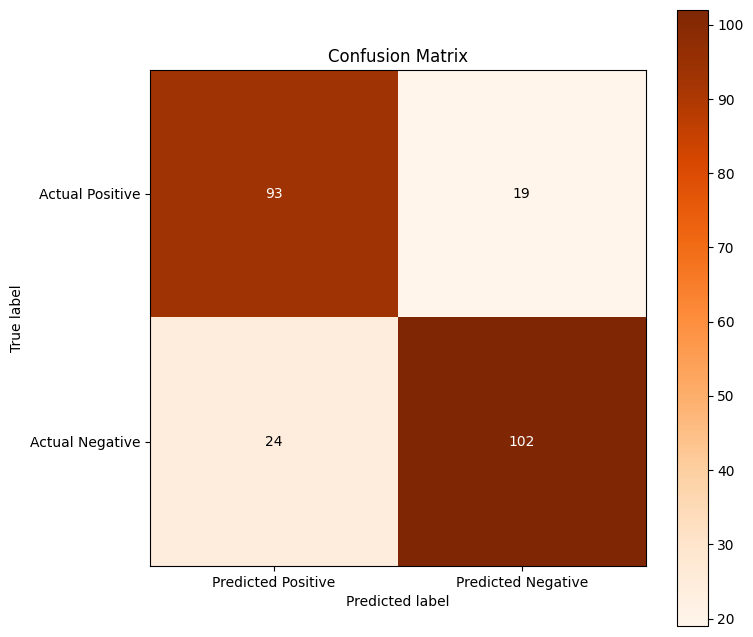

    - Accuracy: 0.819327731092437
    - Precision: 0.8429752066115702
    - Recall: 0.8095238095238095
    - F1: 0.8259109311740891
    - AUC: 0.8810232426303855

- Decision Tree


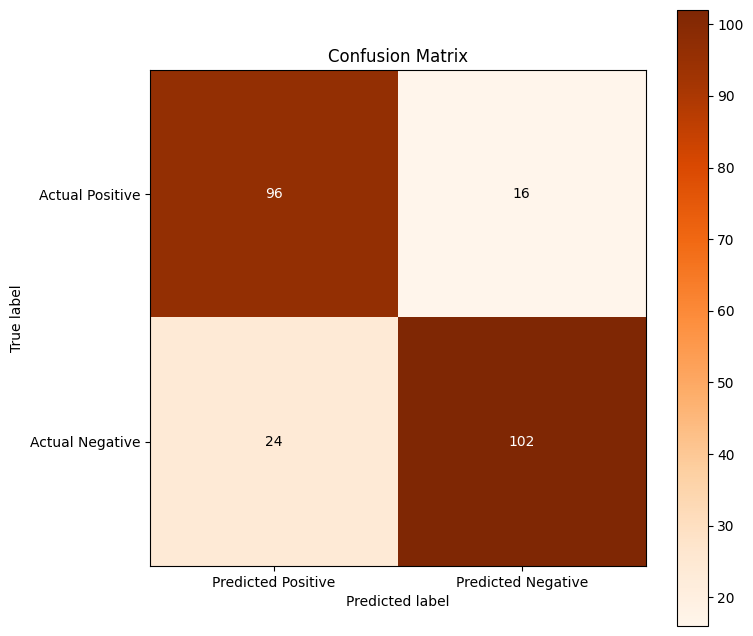

    - Accuracy: 0.8319327731092437
    - Precision: 0.864406779661017
    - Recall: 0.8095238095238095
    - F1: 0.8360655737704918
    - AUC: 0.8333333333333334

- K-Nearest Neighbors


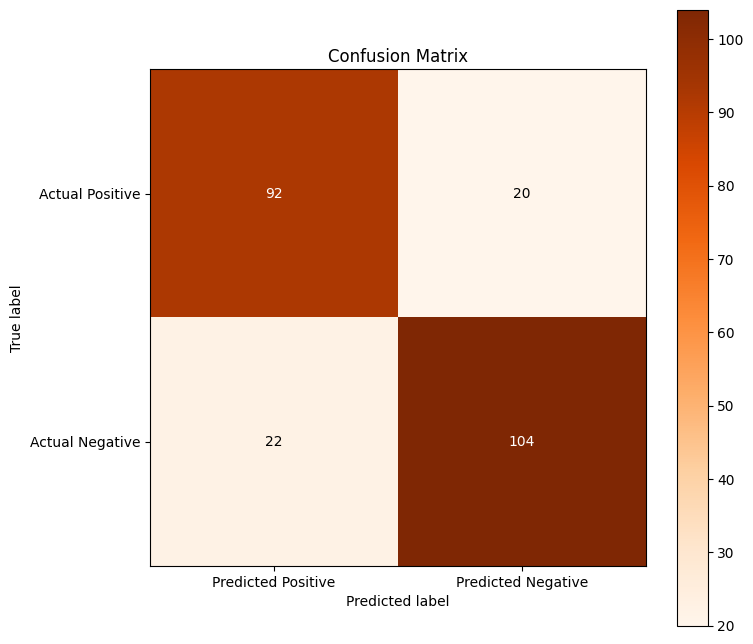

    - Accuracy: 0.8235294117647058
    - Precision: 0.8387096774193549
    - Recall: 0.8253968253968254
    - F1: 0.832
    - AUC: 0.9052579365079365

- Neural Network


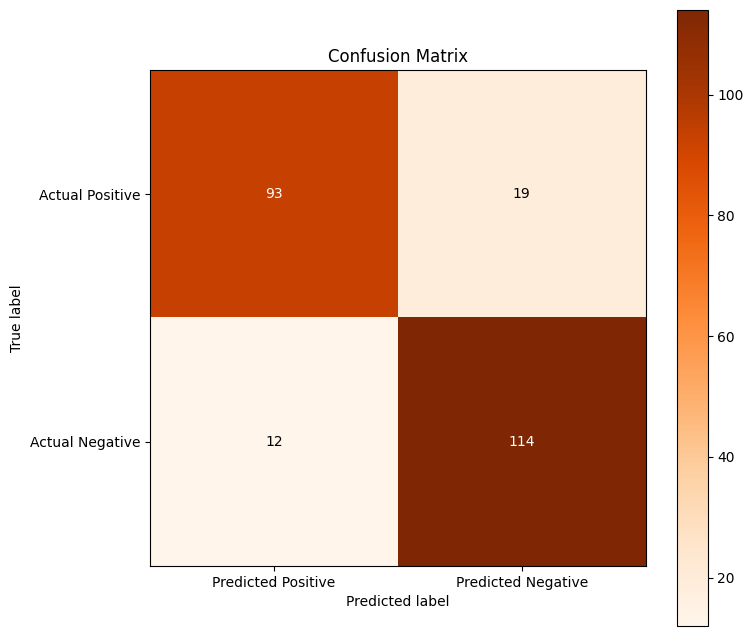

    - Accuracy: 0.8697478991596639
    - Precision: 0.8571428571428571
    - Recall: 0.9047619047619048
    - F1: 0.8803088803088803
    - AUC: 0.8997307256235827


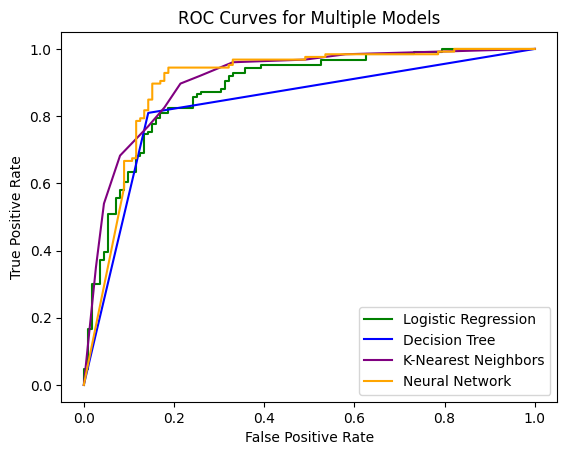

In [100]:
# Cross validate
all_metrics = {}

for i in range(5):
    print(f"\nSplit {i+1}:")
    
    (X_train, X_test, y_train, y_test) = train_test_split(heart_X, heart_y, test_size=0.2, stratify=heart_y)
    
    for key, model in models.items():
        metrics = run_model(key, model['classifier'], model['params'], plt.cm.Oranges)
        all_metrics[key] = metrics
        
plt.figure()

for name, metrics in all_metrics.items():
        plt.plot(metrics['FPR'],metrics['TPR'], linestyle='-', color=models[name]['color'], label=name)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Models')
plt.legend()
plt.show()